# Определение перспективного тарифа для телеком-компании

## Введение

Заказчик - федеральный оператор сотовой связи «Мегалайн».   

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  

Цель - исследовать полученные данные и проверить две гипотезы:  
   - средние выручки c пользователей тарифов «Ультра» и «Смарт» различаются;
   - средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  

Исследование проводится в пять этапов:

1. Обзор данных
2. Предобработка данных
3. Подготовка данных
4. Исследовательский анализ данных
5. Проверки гипотез

## Обзор данных  

Ознакомимся с входными данными.

In [1]:
#импортируем библиотеки

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt   

from scipy import stats as st

In [2]:
import warnings

warnings.filterwarnings('ignore') #игнорируем предупреждения

Прочитаем файлы с данными, в столбцах с датами изменим тип данных на datetime64[ns].

In [3]:
users = pd.read_csv('/datasets/users.csv', parse_dates=['reg_date', 'churn_date'])
#прочитаем файл с данными и сохраним его в переменной users
#одновременно изменим тип данных в столбцах churn_date и reg_date на дату

display(users.head()) #выведем на экран первые 5 строк таблицы
display(users.info()) #получим общую информацию о таблице

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

In [4]:
calls = pd.read_csv('/datasets/calls.csv', parse_dates=['call_date'])
#прочитаем файл с данными и сохраним его в переменной calls
#одновременно изменим тип данных в столбце call_date на дату

display(calls.head()) #выведем на экран первые 5 строк таблицы
display(calls.info()) #получим общую информацию о таблице

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


None

In [5]:
messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])
#прочитаем файл с данными и сохраним его в переменной messades
#одновременно изменим тип данных в столбце message_date на дату

display(messages.head()) #выведем на экран первые 5 строк таблицы
display(messages.info()) #получим общую информацию о таблице

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


None

In [6]:
internet = pd.read_csv('/datasets/internet.csv', parse_dates=['session_date'])
#прочитаем файл с данными и сохраним его в переменной internet
#одновременно изменим тип данных в столбце session_date на дату

display(internet.head()) #выведем на экран первые 5 строк таблицы
display(internet.info()) #получим общую информацию о таблице

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


None

In [7]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
#прочитаем файл с данными и сохраним его в переменной tariffs

display(tariffs.head()) #выведем на экран первые 5 строк таблицы
display(tariffs.info()) #получим общую информацию о таблице

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

Согласно документации к данным:

**Таблица users (информация о пользователях):**  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  

**Таблица calls (информация о звонках):**  

id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

**Таблица messages (информация о сообщениях):**  

id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

**Таблица internet (информация об интернет-сессиях):**  

id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

**Таблица tariffs (информация о тарифах):**  

tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

**Описание тарифов**  

*Тариф «Смарт»*  
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля ; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.  

*Тариф «Ультра»*  
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

«Мегалайн» всегда округляет вверх значения минут и мегабайтов.

### Вывод:  

В нашем распоряжении 5 таблиц с данными о пользователях, их звонках, сообщениях, интернете, а также информация о тарифах.  

Названия колонок написанны корректно и в одном стиле.  

Во всех таблицах пропусков нет, кроме столбца churn_date в таблице users — в нем указана дата прекращения пользования тарифом: если значение пропущено, то тариф ещё действовал на момент выгрузки данных.  

В данных есть звонки и интернет сессии с нулевой продолжительностью, а также нули в сообщениях  - нулями обозначены пропущенные звонки, не использованные Гб или не отправленные сообщения.  

В столбцах с датами заменили тип данных object на datetime64[ns].

## Предобработка данных

### Поиск некорректных значений  

- Выведем уникальные значения столбцов age, tariff и city из таблицы users.

In [8]:
unique_colomns = users[['age', 'tariff']]
#сохраним в переменную нужные нам столбцы

for col in unique_colomns: #создаем цикл, который выведет уникальные значения по всем выбранным столбцам
    print(col, ': ', users[col].unique())
    print()

age :  [52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]

tariff :  ['ultra' 'smart']



In [9]:
sorted(users['city'].unique())  #выведем отсортированные уникальные значения

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

- Найдем отрицательные значения в столбцах duration таблицы calls и mb_used таблицы internet

In [10]:
calls.loc[calls.loc[:,'duration'] < 0]['duration'].sum()

0.0

In [11]:
internet.loc[internet.loc[:, 'mb_used'] < 0]['mb_used'].sum()

0.0

Все значения корректны. Отрицательных значений нет.

### Округление значений  

- Округлим звонки до минут и изменит тип данных на Int64.

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype(int)
#округление значений в столбце duration

display(calls.head()) #выведем на экран первые 5 строк таблицы
display(calls.info()) #получим общую информацию о таблице

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


None

- Округлим объём потраченного за сессию интернет-трафика до мегабайтов и изменит тип данных на Int64.

In [13]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)
#округление значений в столбце duration

display(internet.head()) #выведем на экран первые 5 строк таблицы
display(internet.info()) #получим общую информацию о таблице

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


None

Изменения прошли успешно.

### Вывод  

Данные во всех таблицах записаны корректно.  

Округлили значения в столбцах calls и internet до минут и мегабайт соответственно. Для удобства работы с данными изменили тип данных на Int64.

## Подготовка данных

#### Посчитаем для каждого пользователя кол-во отправленных сообщений по месяцам

Создадим новый столбец month в таблице messages с месяцами отправления сообщений.

In [14]:
messages['month'] = messages['message_date'].dt.month
#создаем новый столбец, в который записываем месяц из столбца с датой

Добавим новый столбец tariff из таблицы users в таблицу messages.

In [15]:
messages = messages.merge(users[['user_id','tariff']], on='user_id')
#добавляем новый столбец из таблицы users к таблице messages
messages.head() #выводим первые 5 строк

,id,message_date,user_id,month,tariff
0,1000_0,2018-06-27,1000,6,ultra
1,1000_1,2018-10-08,1000,10,ultra
2,1000_2,2018-08-04,1000,8,ultra
3,1000_3,2018-06-16,1000,6,ultra
4,1000_4,2018-12-05,1000,12,ultra


Создадим сгруппированую таблицу по тарифам, user_id и месяцам; посчитаем кол-во сообщений по каждому пользователю.

In [16]:
messages_month_groupby = messages.groupby(['tariff','user_id','month']).agg({'id':'count'}).reset_index()
#группируем таблицу, считаем кол-во сообщений, удаляем старые индексы 
messages_month_groupby #выводим на экран

,tariff,user_id,month,id
0,smart,1002,6,4
1,smart,1002,7,11
2,smart,1002,8,13
3,smart,1002,9,4
4,smart,1002,10,10
...,...,...,...,...
2712,ultra,1495,8,13
2713,ultra,1495,9,82
2714,ultra,1495,10,82
2715,ultra,1495,11,79


#### Посчитаем для каждого пользователя кол-во сделанных звонков и израсходованных минут разговора по месяцам

Создадим новый столбец month в таблице calls с месяцами, когда были совершены звонки.

In [17]:
calls['month'] = calls['call_date'].dt.month
#создаем новый столбец, в который записываем месяц из столбца с датой

Добавим новый столбец tariff из таблицы users в таблицу calls

In [18]:
calls = calls.merge(users[['user_id','tariff']], on='user_id')
#добавляем новый столбец из таблицы users к таблице calls
calls.head() #выводим первые 5 строк

,id,call_date,duration,user_id,month,tariff
0,1000_0,2018-07-25,0,1000,7,ultra
1,1000_1,2018-08-17,0,1000,8,ultra
2,1000_2,2018-06-11,3,1000,6,ultra
3,1000_3,2018-09-21,14,1000,9,ultra
4,1000_4,2018-12-15,6,1000,12,ultra


Создадим сгруппированую таблицу по тарифам, user_id и месяцам, посчитаем кол-во звонков по каждому пользователю.

In [19]:
calls_month_groupby_count = calls.groupby(['tariff','user_id','month']).agg({'id':'count'}).reset_index()
#группируем таблицу, считаем кол-во звонков, удаляем старые индексы 
calls_month_groupby_count #выводим на экран

,tariff,user_id,month,id
0,smart,1001,11,59
1,smart,1001,12,63
2,smart,1002,6,15
3,smart,1002,7,26
4,smart,1002,8,42
...,...,...,...,...
3169,ultra,1495,8,17
3170,ultra,1495,9,112
3171,ultra,1495,10,152
3172,ultra,1495,11,129


 Посчитаем сумму израсходованных минут разговора по месяцам.

In [20]:
calls_month_groupby_sum = calls.groupby(['tariff','user_id','month']).agg({'duration':'sum'}).reset_index()
#группируем таблицу, считаем сумму минут разговора, удаляем старые индексы 
calls_month_groupby_sum #выводим на экран

,tariff,user_id,month,duration
0,smart,1001,11,430
1,smart,1001,12,414
2,smart,1002,6,117
3,smart,1002,7,214
4,smart,1002,8,289
...,...,...,...,...
3169,ultra,1495,8,92
3170,ultra,1495,9,813
3171,ultra,1495,10,1030
3172,ultra,1495,11,954


#### Посчитаем объем израсходованного интернет-трафика по месяцам

Создадим новый столбец month в таблицу internet с месяцами, в которых пользовались интернетом

In [21]:
internet['month'] = internet['session_date'].dt.month
#создаем новый столбец, в который записываем месяц из столбца с датой

Добавим новый столбец tariff из таблицы users в таблицу internet

In [22]:
internet = internet.merge(users[['user_id','tariff']], on='user_id')
#добавляем новый столбец из таблицы users к таблице internet
internet.head() #выводим первые 5 строк

,Unnamed: 0,id,mb_used,session_date,user_id,month,tariff
0,0,1000_0,113,2018-11-25,1000,11,ultra
1,1,1000_1,1053,2018-09-07,1000,9,ultra
2,2,1000_2,1198,2018-06-25,1000,6,ultra
3,3,1000_3,551,2018-08-22,1000,8,ultra
4,4,1000_4,303,2018-09-24,1000,9,ultra


Создадим сгруппированую таблицу по тарифам, user_id и месяцам, посчитаем объем израсходованного интернет-трафика по каждому пользователю.

In [23]:
internet_month_groupby = internet.groupby(['tariff','user_id','month']).agg({'mb_used':'sum'}).reset_index()
#группируем таблицу, считаем сумму трафика, удаляем старые индексы 
internet_month_groupby #выводим на экран

,tariff,user_id,month,mb_used
0,smart,1001,11,18452
1,smart,1001,12,14053
2,smart,1002,6,10871
3,smart,1002,7,17601
4,smart,1002,8,20347
...,...,...,...,...
3198,ultra,1495,8,2616
3199,ultra,1495,9,33105
3200,ultra,1495,10,29393
3201,ultra,1495,11,38972


### Объединение таблиц

#### Объединим сгруппированные по сообщениям, звонкам и объему интернет-трафика таблицы в одну

In [24]:
combined_data = messages_month_groupby\
.merge(calls_month_groupby_sum, on=['user_id', 'month', 'tariff'], how='outer')\
.merge(internet_month_groupby, on=['user_id', 'month', 'tariff'], how='outer')
#создадим новую таблицу, в которой объединим messages_month_groupby, calls_month_groupby_sum и internet_month_groupby

combined_data.head() #выведем первые пять строк на экран

,tariff,user_id,month,id,duration,mb_used
0,smart,1002,6,4.0,117.0,10871.0
1,smart,1002,7,11.0,214.0,17601.0
2,smart,1002,8,13.0,289.0,20347.0
3,smart,1002,9,4.0,206.0,16712.0
4,smart,1002,10,10.0,212.0,13905.0


Изменим названия столбцов на:  
messages_count - кол-во сообщений  
duration_sum - сумма минут звонков  
mb_used_sum - сумма мегабайт интернет трафика  

In [25]:
combined_data = combined_data.rename(columns={'id':'messages_count', 'duration':'duration_sum', 'mb_used':'mb_used_sum'})
#меняем названия столбцов
combined_data.columns #выводим названия столбцов на экран

Index(['tariff', 'user_id', 'month', 'messages_count', 'duration_sum',
       'mb_used_sum'],
      dtype='object')

Разделим пользователей из таблицы combined_data по тарифам ultra и smart и добавим их в новые таблицы users_ultra и users_smart.

In [26]:
users_ultra = combined_data.loc[combined_data.loc[:,'tariff'] == 'ultra'].reset_index(drop=True)
#создадим новую таблицу с пользователями тарифа ultra, заменяем старые индексы на новые
users_ultra.head() #выведем первые 5 строк таблицы

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum
0,ultra,1000,5,22.0,159.0,2256.0
1,ultra,1000,6,60.0,172.0,23257.0
2,ultra,1000,7,75.0,340.0,14016.0
3,ultra,1000,8,81.0,408.0,14070.0
4,ultra,1000,9,57.0,466.0,14581.0


In [27]:
users_smart = combined_data.loc[combined_data.loc[:,'tariff'] == 'smart'].reset_index(drop=True)
#создадим новую таблицу с пользователями тарифа smart, заменяем старые индексы на новые
users_smart.head() #выведем первые 5 строк таблицы

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum
0,smart,1002,6,4.0,117.0,10871.0
1,smart,1002,7,11.0,214.0,17601.0
2,smart,1002,8,13.0,289.0,20347.0
3,smart,1002,9,4.0,206.0,16712.0
4,smart,1002,10,10.0,212.0,13905.0


#### Добавим в таблицы users_ultra и users_smart столбцы с данными о превышении лимитов по тарифу

messages_overrun - превышение кол-ва сообщений по тарифу  
call_sum_overrun - превышение по суммарному времени звонков  
mb_overrun - превышение по объему интернет-трафика по тарифу  

Из данных по сообщениям, звонкам и интернет-трафику вычтем бесплатный лимит, а остаток запишем в новые столбецы: messages_overrun, call_sum_overrun и mb_overrun - это будет превышение по лимиту.

**1) для таблицы users_ultra:**

In [28]:
def function1(users_ultra): #создадим функцию, которая будет присваивать результат, в зависимости от кол-ва сообщений
    if users_ultra['messages_count'] > 1000.0:
        result1 = users_ultra['messages_count'] - 1000
        return result1
    else:
        return 0

users_ultra['messages_overrun'] = users_ultra.apply(function1, axis = 1)
#создаем новый столбец со значениями из функции

In [29]:
def function2(users_ultra): #создадим функцию, которая будет присваивать результат, в зависимости суммы звонков
    if users_ultra['duration_sum'] > 3000.0:
        result2 = users_ultra['duration_sum'] - 3000
        return result2
    else:
        return 0
    
users_ultra['call_sum_overrun'] = users_ultra.apply(function2, axis = 1)
#создаем новый столбец со значениями из функции

In [30]:
def function3(users_ultra): #создадим функцию, которая будет присваивать результат, в зависимости суммы интернет-трафика
    if users_ultra['mb_used_sum'] > 30720.0:
        result3 = users_ultra['mb_overrun'] = users_ultra['mb_used_sum'] - 30720
        return result3
    else:
        return 0

users_ultra['mb_overrun'] = users_ultra.apply(function3, axis = 1)
#создаем новый столбец со значениями из функции

Переведем значения столбца mb_overrun в гигабайты и округлим значения.

In [31]:
users_ultra['mb_overrun'] = users_ultra['mb_overrun'] / 1024 #переводим мегабайты в гигабайты (1024 Мб = 1Гб)

In [32]:
users_ultra['mb_overrun'] = np.ceil(users_ultra['mb_overrun']) #округляем значения до целого гигабайта

In [33]:
users_ultra.head() #выведем первые 5 строк таблицы

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun
0,ultra,1000,5,22.0,159.0,2256.0,0,0,0.0
1,ultra,1000,6,60.0,172.0,23257.0,0,0,0.0
2,ultra,1000,7,75.0,340.0,14016.0,0,0,0.0
3,ultra,1000,8,81.0,408.0,14070.0,0,0,0.0
4,ultra,1000,9,57.0,466.0,14581.0,0,0,0.0


**2) для таблицы users_smart**

In [34]:
def function1(users_smart): #создадим функцию, которая будет присваивать результат, в зависимости от кол-ва сообщений
    if users_smart['messages_count'] > 50.0:
        result1 = users_smart['messages_count'] - 50
        return result1
    else:
        return 0

users_smart['messages_overrun'] = users_smart.apply(function1, axis = 1)
#создаем новый столбец со значениями из функции

In [35]:
def function2(users_smart): #создадим функцию, которая будет присваивать результат, в зависимости суммы звонков
    if users_smart['duration_sum'] > 500.0:
        result2 = users_smart['duration_sum'] - 500
        return result2
    else:
        return 0
    
users_smart['call_sum_overrun'] = users_smart.apply(function2, axis = 1)
#создаем новый столбец со значениями из функции

In [36]:
def function3(users_smart): #создадим функцию, которая будет присваивать результат, в зависимости суммы интернет-трафика
    if users_smart['mb_used_sum'] > 15360.0:
        result3 = users_smart['mb_overrun'] = users_smart['mb_used_sum'] - 15360
        return result3
    else:
        return 0

users_smart['mb_overrun'] = users_smart.apply(function3, axis = 1)
#создаем новый столбец со значениями из функции

Переведем значения столбца mb_overrun в гигабайты и округлим значения.

In [37]:
users_smart['mb_overrun'] = users_smart['mb_overrun'] / 1024 #переводим мегабайты в гигабайты (1024 Мб = 1Гб)

In [38]:
users_smart['mb_overrun'] = np.ceil(users_smart['mb_overrun']) #округляем значения до целого гигабайта

In [39]:
users_smart.head() #выведем первые 5 строк таблицы

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun
0,smart,1002,6,4.0,117.0,10871.0,0.0,0.0,0.0
1,smart,1002,7,11.0,214.0,17601.0,0.0,0.0,3.0
2,smart,1002,8,13.0,289.0,20347.0,0.0,0.0,5.0
3,smart,1002,9,4.0,206.0,16712.0,0.0,0.0,2.0
4,smart,1002,10,10.0,212.0,13905.0,0.0,0.0,0.0


### Помесячная выручка с каждого пользователя   

Рассчитаем помесячную выручку по каждому пользователю. Для этово возьмем данные по привышению лимитов и умножим их на значение из тарифного плана, прибавим абонентскую плату, соответствующую тарифному плану.

- **для тарифа "Ультра"**

In [40]:
users_ultra['revenue'] =  (users_ultra['messages_overrun'] * 1
                             + users_ultra['call_sum_overrun'] * 1
                             + users_ultra['mb_overrun'] * 150 + 1950)

In [41]:
users_ultra #выводим таблицу

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun,revenue
0,ultra,1000,5,22.0,159.0,2256.0,0,0,0.0,1950.0
1,ultra,1000,6,60.0,172.0,23257.0,0,0,0.0,1950.0
2,ultra,1000,7,75.0,340.0,14016.0,0,0,0.0,1950.0
3,ultra,1000,8,81.0,408.0,14070.0,0,0,0.0,1950.0
4,ultra,1000,9,57.0,466.0,14581.0,0,0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...
980,ultra,1469,9,NaN,763.0,33725.0,0,0,3.0,2400.0
981,ultra,1469,10,NaN,908.0,33416.0,0,0,3.0,2400.0
982,ultra,1469,11,NaN,795.0,35533.0,0,0,5.0,2700.0
983,ultra,1469,12,NaN,635.0,27786.0,0,0,0.0,1950.0


- **для тарифа "Смарт"**

In [42]:
users_smart['revenue'] =  (users_smart['messages_overrun'] * 3
                             + users_smart['call_sum_overrun'] * 3
                             + users_smart['mb_overrun'] * 200 + 550)

In [43]:
users_smart #выводим таблицу

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun,revenue
0,smart,1002,6,4.0,117.0,10871.0,0.0,0.0,0.0,550.0
1,smart,1002,7,11.0,214.0,17601.0,0.0,0.0,3.0,1150.0
2,smart,1002,8,13.0,289.0,20347.0,0.0,0.0,5.0,1550.0
3,smart,1002,9,4.0,206.0,16712.0,0.0,0.0,2.0,950.0
4,smart,1002,10,10.0,212.0,13905.0,0.0,0.0,0.0,550.0
...,...,...,...,...,...,...,...,...,...,...
2224,smart,1494,8,NaN,262.0,6601.0,0.0,0.0,0.0,550.0
2225,smart,1494,9,NaN,501.0,16986.0,0.0,1.0,2.0,953.0
2226,smart,1494,10,NaN,354.0,17794.0,0.0,0.0,3.0,1150.0
2227,smart,1494,11,NaN,411.0,18076.0,0.0,0.0,3.0,1150.0


- Построим гистограмму по выручкам для тарифов "Ультра" и "Смарт", чтобы визуализировать распределение выручки.

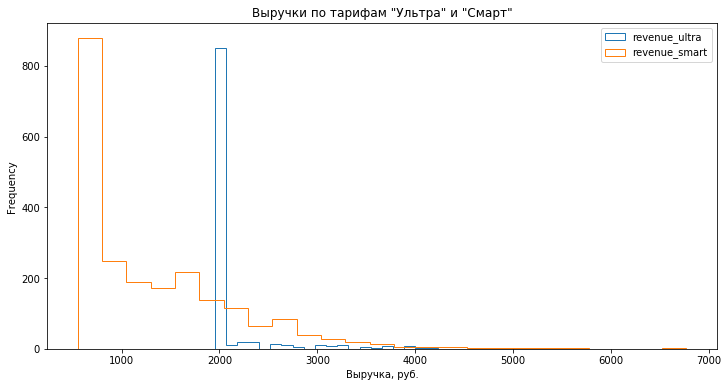

In [44]:
ax = users_ultra.plot(kind='hist', y='revenue',histtype='step', bins=25, label='revenue_ultra', figsize=(12,6))
users_smart.plot(kind='hist', y='revenue',histtype='step', bins=25, label='revenue_smart', ax=ax, legend=True)
#строим гистограммы по выручкам на одном графике
plt.title('Выручки по тарифам "Ультра" и "Смарт"')
plt.xlabel('Выручка, руб.');

На гистограммах заметно выделяются столбцы со значениями, равными абонентской плате по обоим тарифам. Это значит, что большую часть выручки делает плата по тарифу. Пользователи платят за дополнительные минуты, сообщения и интернет не так часто, особенно на тарифе "Ультра". На тарифе "Смарт" пользователи чаще привышают лимиты по тарифу и вынуждены платить сверх абонентской платы. 

### Вывод  

Подготовили данные для дальнейшего исследования:  

- посчитали для каждого пользователя кол-во сообщений, кол-во звонков, сумму минут всех звонков и сумму интернет-трафика, сгруппировали полученные данные по месяцам и добавили в соответствующие таблицы;  
- создали новую таблицу, в которой объединили данные из таблиц с предыдущими подсчетами;
- разделили новую таблицу на две по тарифам "Ультра" и "Смарт";
- посчитали для каждого тарифа помесячную выручку с каждого пользователя и добавили данные в таблицы;
- посмотрели на распределение выручки по тарифам и определили, что основной доход приносит чистая плата по тарифу, а пользователи тарифа "Смарт" чаще платят за дополнительные услуги.

## Исследовательский анализ данных  

Опишем поведение клиентов оператора, исходя из полученных данных.  
Построим гистограммы по кол-ву сообщений, сумме звонков и интернет трафика по каждому тарифу.  
Выведем числовые данные по столбцам messages_count, duration_sum и mb_used_sum.

#### Для тарифа «Ультра»


- Построим гистограммы

Text(0.5, 0, 'Количество интернет-трафика')

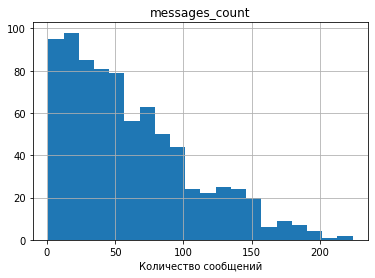

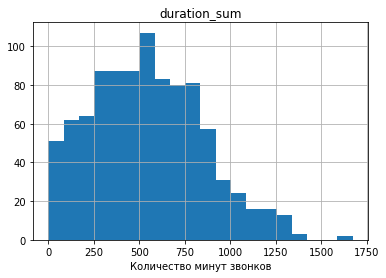

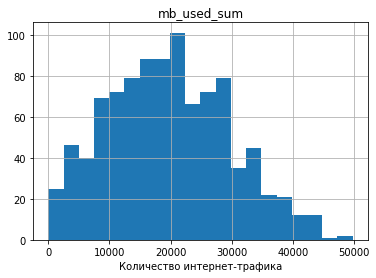

In [45]:
users_ultra.hist('messages_count', bins=20) #для кол-ва сообщений
plt.xlabel('Количество сообщений')

users_ultra.hist('duration_sum', bins=20) #для суммы звонков
plt.xlabel('Количество минут звонков')

users_ultra.hist('mb_used_sum', bins=20); #для суммы интернет-трафика
plt.xlabel('Количество интернет-трафика')


 - Выведем числовые данные по столбцам messages_count, duration_sum и mb_used_sum

In [46]:
users_ultra[['messages_count', 'duration_sum', 'mb_used_sum']].describe().round()
#выведем основные характеристики по услугам на экран

,messages_count,duration_sum,mb_used_sum
count,795.0,951.0,975.0
mean,61.0,545.0,19687.0
std,46.0,307.0,9952.0
min,1.0,0.0,0.0
25%,24.0,310.0,12020.0
50%,51.0,528.0,19411.0
75%,88.0,756.0,26920.0
max,224.0,1673.0,49789.0


- Найдем дисперсию messages_count, duration_sum и mb_used_sum

In [47]:
variance = np.var(users_ultra[['messages_count', 'duration_sum', 'mb_used_sum']]).round()
variance
#найдем дисперсию по каждой услуге и выведем на экран

messages_count        2107.0
duration_sum         94104.0
mb_used_sum       98941857.0
dtype: float64

Из гистограмм и основных характеристик по данным тарифа "Ультра" можно понять, что:  
1) гистограммы сообщений и звонков скошены влево, что говорит, о малом использовании этих услуг в данном тарифе;  
2) пользователи  отправляют мало сообщений, среднее и медиана этих значений близки и составляют примерно 55 сообщений в месяц, даже max не привышает 250 сообщений, т. е. все абоненты укладываются в тариф;  
3) сумма звонков также не привышает 1700 минут, в среднем пользователи тратят 600 минут на звонки, и всегда укладываются в тариф;  
4) большая часть абонентов использует интернет-трафик в рамках тарифа, но около 20% пользователей превышают лимиты и платят за дополнительный интернет.  

#### Для тарифа «Смарт»  

- Построим гистограммы

Text(0.5, 0, 'Количество интернет-трафика')

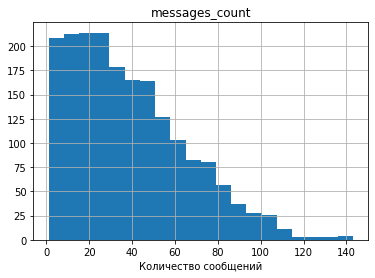

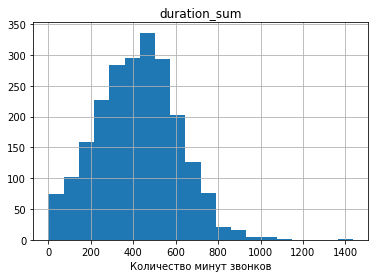

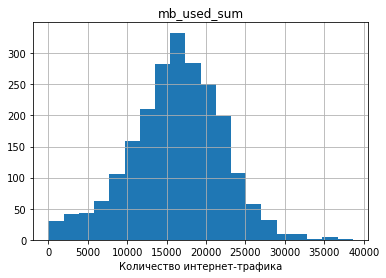

In [48]:
users_smart.hist('messages_count', bins=20) #для кол-ва сообщений
plt.xlabel('Количество сообщений')

users_smart.hist('duration_sum', bins=20) #для суммы звонков
plt.xlabel('Количество минут звонков')

users_smart.hist('mb_used_sum', bins=20); #для суммы интернет-трафика
plt.xlabel('Количество интернет-трафика')

- Выведем числовые данные по столбцам messages_count, duration_sum и mb_used_sum

In [49]:
users_smart[['messages_count', 'duration_sum', 'mb_used_sum']].describe().round()
#выведем основные характеристики по услугам на экран

,messages_count,duration_sum,mb_used_sum
count,1922.0,2223.0,2228.0
mean,39.0,419.0,16236.0
std,27.0,189.0,5869.0
min,1.0,0.0,0.0
25%,17.0,285.0,12668.0
50%,34.0,423.0,16532.0
75%,55.0,546.0,20068.0
max,143.0,1435.0,38610.0


- Найдем дисперсию messages_count, duration_sum и mb_used_sum

In [50]:
variance = np.var(users_smart[['messages_count', 'duration_sum', 'mb_used_sum']]).round()
variance
#найдем дисперсию по каждой услуге и выведем на экран

messages_count         717.0
duration_sum         35828.0
mb_used_sum       34427641.0
dtype: float64

Из гистограмм и основных характеристик по данным тарифа "Смарт" можно понять, что:  

1) гистограмма сообщений сильно скошена влево, что говорит о преобладании малого кол-ва сообщений, гистограмма интернет-трафика близка к нормальному распеределению - в этом тарифе пользователи в большинстве случаев расходуют весь пакет интернета;  
2) основная часть пользователей укладывается в тариф по кол-ву сообщений, среднее 39 сообщений, что близко к лимиту, около 25% абонентов платят за дополнительные сообщения вне тарифа;  
3) по звонкам также привышены лимиты по тарифу почти в 30% случаев;  
4) среднее по интернет-трафику немного превышает лимит по тарифу, что говорит о том, что больше 50% пользователей платят за дополнительный интернет.  

### Вывод  

В основном за дополнительные услуги переплачивают пользователи тарифа "Смарт", в большинстве случаев за интернет-трафик.

## Проверка гипотез

####  Первая гипотеза  

Для проверки гипотезы исследования, что средние выручки c пользователей тарифов «Ультра» и «Смарт» различаются, выдвенем новую нулевую гипотезу.

**Нулевая гипотеза:** средние выручки c пользователей тарифов «Ультра» и «Смарт» равны.  
**Альтернативная гипотеза:** средние выручки c пользователей тарифов «Ультра» и «Смарт» не равны.

**Проверка гипотезы:** посчитаем и сравним средние таблиц users_ultra и users_smart. Уровень статистической значимости зададим в 5%.

In [51]:
users_ultra['revenue'].mean().round() #находим среднее для выручки тарифа "Ультра"

2071.0

In [52]:
users_smart['revenue'].mean().round() #находим среднее для выручки тарифа "Смарт"

1295.0

In [53]:
#находим разницу между средними по выручке
(users_ultra['revenue'].mean() - users_smart['revenue'].mean()) / users_ultra['revenue'].mean() *100 

37.489229870952414

Из расчетов видно, что средние выручки не равны. 

Чтобы убедиться в правильности наших выводов проведем t-тест для двух независимых выборок по тарифам. Сравним выборки по размеру, если они разные, то указываем значение параметра equal_var как False.

In [54]:
users_smart.shape[0] # выводим кол-во строк в таблице users_smart

2229

In [55]:
users_ultra.shape[0] # выводим кол-во строк в таблице users_ultra

985

In [56]:
results = st.ttest_ind (users_ultra['revenue'], users_smart['revenue'], equal_var=False) # проводим т-тест
results.pvalue

2.7240946993530856e-246

Выручка по тарифу "Ультра" на 37% больше выручки по тарифу "Смарт", pvalue близкое к нулю. Полученные данные опровергают нулевую гипотезу, принимаем альтернативную гипотезую. Следовательно, раз выручки не равны - они различаются. Первая гипотеза исследования подтверждена.

####   Вторая гипотеза

Для проверки гипотезы исследования, что средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов, выдвенем новую нулевую гипотезу.

**Нулевая гипотеза:** средняя выручка с пользователей из Москвы равна выручке с пользователей из других регионов.  
**Альтернативная гипотеза:** средняя выручка с пользователей из Москвы не равна выручке с пользователей из других регионов.

- **для тарифа "Ультра"**

Добавим в таблицу users_ultra города пользователей.

In [57]:
users_ultra_city = users_ultra.merge(users[['user_id', 'city']], on='user_id')
#создадим новую таблицу, в которую добавим  столбец city из таблицы users
users_ultra_city #выведем таблицу на экран

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun,revenue,city
0,ultra,1000,5,22.0,159.0,2256.0,0,0,0.0,1950.0,Краснодар
1,ultra,1000,6,60.0,172.0,23257.0,0,0,0.0,1950.0,Краснодар
2,ultra,1000,7,75.0,340.0,14016.0,0,0,0.0,1950.0,Краснодар
3,ultra,1000,8,81.0,408.0,14070.0,0,0,0.0,1950.0,Краснодар
4,ultra,1000,9,57.0,466.0,14581.0,0,0,0.0,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...
980,ultra,1469,8,NaN,779.0,33068.0,0,0,3.0,2400.0,Сочи
981,ultra,1469,9,NaN,763.0,33725.0,0,0,3.0,2400.0,Сочи
982,ultra,1469,10,NaN,908.0,33416.0,0,0,3.0,2400.0,Сочи
983,ultra,1469,11,NaN,795.0,35533.0,0,0,5.0,2700.0,Сочи


Посчитаем среднюю выручку по таблице users_ultra_city.

In [58]:
#сохраняем в переменную строки с городом москва
moscow_ultra = users_ultra_city.loc[users_ultra_city.loc[:, 'city'] == 'Москва']
#находим среднюю выручку
moscow_ultra.agg({'revenue': 'mean'}).round()

revenue    2075.0
dtype: float64

In [59]:
#сохраняем в переменную строки с другими городами
other_ultra = users_ultra_city.loc[users_ultra_city.loc[:, 'city'] != 'Москва']
#находим среднюю выручку
other_ultra.agg({'revenue': 'mean'}).round()

revenue    2070.0
dtype: float64

- **для тарифа "Смарт"**

Добавим в таблицу users_smart города пользователей.

In [60]:
users_smart_city = users_smart.merge(users[['user_id', 'city']], on='user_id')
#создадим новую таблицу, в которую добавим  столбец city из таблицы users
users_smart_city #выведем таблицу на экран

,tariff,user_id,month,messages_count,duration_sum,mb_used_sum,messages_overrun,call_sum_overrun,mb_overrun,revenue,city
0,smart,1002,6,4.0,117.0,10871.0,0.0,0.0,0.0,550.0,Стерлитамак
1,smart,1002,7,11.0,214.0,17601.0,0.0,0.0,3.0,1150.0,Стерлитамак
2,smart,1002,8,13.0,289.0,20347.0,0.0,0.0,5.0,1550.0,Стерлитамак
3,smart,1002,9,4.0,206.0,16712.0,0.0,0.0,2.0,950.0,Стерлитамак
4,smart,1002,10,10.0,212.0,13905.0,0.0,0.0,0.0,550.0,Стерлитамак
...,...,...,...,...,...,...,...,...,...,...,...
2224,smart,1494,8,NaN,262.0,6601.0,0.0,0.0,0.0,550.0,Омск
2225,smart,1494,9,NaN,501.0,16986.0,0.0,1.0,2.0,953.0,Омск
2226,smart,1494,10,NaN,354.0,17794.0,0.0,0.0,3.0,1150.0,Омск
2227,smart,1494,11,NaN,411.0,18076.0,0.0,0.0,3.0,1150.0,Омск


 Посчитаем среднюю выручку по таблице users_smart_city.

In [61]:
#сохраняем в переменную строки с городом москва
moscow_smart = users_smart_city.loc[users_smart_city.loc[:, 'city'] == 'Москва']
#находим среднюю выручку
moscow_smart.agg({'revenue': 'mean'}).round()

revenue    1245.0
dtype: float64

In [62]:
#сохраняем в переменную строки с городом москва
other_smart = users_smart_city.loc[users_smart_city.loc[:, 'city'] != 'Москва']
#находим среднюю выручку
other_smart.agg({'revenue': 'mean'}).round()

revenue    1305.0
dtype: float64

**Проверка гипотезы:** сложим средние выручки по тарифам и найдем разницу между пользователями из Москвы и других городов. 

In [63]:
#находим разницу между средними выручками по москве и другим регионам
((other_ultra.agg({'revenue': 'mean'}) + other_smart.agg({'revenue': 'mean'}))\
 - (moscow_ultra.agg({'revenue': 'mean'}) + moscow_smart.agg({'revenue': 'mean'})))\
/(other_ultra.agg({'revenue': 'mean'}) + other_smart.agg({'revenue': 'mean'}))*100

revenue    1.613007
dtype: float64

Проведем т-тест для подтверждения полученных результатов. Сравним выборки по размеру, если они разные, то указываем значение параметра equal_var как False. Уровень статистической значимости зададим в 5%.

In [64]:
moscow = moscow_ultra.merge(moscow_smart, how='outer') #создадим таблицу по пользователям из Москвы
other = other_ultra.merge(other_smart, how='outer') #создадим таблицу по пользователям из других городов

In [65]:
moscow.shape[0] # выводим кол-во строк в таблице moscow

611

In [66]:
other.shape[0] # выводим кол-во строк в таблице other

2603

In [67]:
results = st.ttest_ind (moscow['revenue'], other['revenue'], equal_var=False) # проводим т-тест
results.pvalue

0.5126564657748214

Средняя выручка по тарифам в других регионах больше средней выручки по Москве примерно на 1,6%,  pvalue = 50%, что значительно выше уровня статистической значимости. Полученные данные подтверждают нулевую гипотезу. Следовательно, раз выручки равны - они не отличаются, вторую гипотезу исследования опровергаем.

### Вывод   

Исследуемые данные подтвердили первую гипотезу нашего исследования, но опровергли вторую.

## Общий вывод

Прежде чем подтвердить или опровергнуть гипотезы мы ознакомились с данными, проверили их корректность, изменили некоторые типы данных, добавили столбцы с недостающей информацией.  

Подготовили данные для исследования:
- в тарифах "Ультра" и "Смарт" посчитали для всех пользователей кол-во отправленных сообщений, сумму минут звонков и сумму мегабайт использованного интернет трафика, сгруппировали по месяцам;
- добавили в таблицу привышения по лимитам и посчитали выручку за каждый месяц по всем пользователям.  
Исследовали полученные значения и описали поведение пользователей для каждого тарифа:
- для тарифа "Ультра" превышение по лимитам не характерно, основная часть абонентов платит только абонентскую плату; 20% пользователей платит за дополнительный интернет;  
- для "Смарт" характерно использование большего кол-ва минут и интернет трафика, чем предусмотрено тарифом; более 50% пользователей доплачивают за интернет.  

Исхода из полученных данных, проверили гипотезы:  
- сравнили средее по выручке для тарифа "Ультра" со средним для тарифа "Смарт" получили разницу больше уровня статистической значимости. Среднее по выручке тарифа "Ультра" на 37% больше среднего тарифа "Смарт". Следовательно гипотеза о том, что средние выручки c пользователей тарифов «Ультра» и «Смарт» различаются подтверждена;  
- сравнили средее по выручке для пользователей из Москвы и из других регионов, получили разницу в 1,6%, что меньше уровня статистической значимости, следовательно гипотезу о том, что средняя выручка с пользователей из Москвы отличается от выручки с пользователей из других регионов отвергаем.  

Для всех городов и регионов, тариф "Ультра" приносит больше денег.